In [5]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import shutil

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False
# 매직명령어 => 쥬피터노트북에서 그래프 삽입 기능 
%matplotlib inline
# 글꼴 선명화 
%config InlineBackend.figure_format = 'retina'

# 랜덤 모듈
import random

# 학습 모델 저장 및 복원
import pickle

# 딥러닝 라이브러리
import tensorflow as tf
# 신경망 모델을 관리하는 객체
from tensorflow.keras.models import Sequential
# 선형 회귀 레이어
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 객체
from tensorflow.keras.layers import Activation

# CNN : 커널을 통해 합성곱을 구하는 것. 이미지의 특징이 두드러 지게 한다.
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D

# MaxPooling : 커널내에서 가장 큰 값을 추출하는 방식으로 불필요한 부분을 제거한다.
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPool1D

# 1차원으로 변환하는 것
from tensorflow.keras.layers import Flatten

# Dropout : 이미자나 영상, 음파 등의 데이터는 오랫동안 학습을 진행 시켜야 한다.
# 하지만 너무 빨리 과적합이 발생되면 조기 중단 때문에 학습 횟수가 줄어들 수 있다.
# 이에 은닉의 노드를 일부 사용하지 않으므로써 과적합이 빨리 오는 것을 예방하고
# 오랫동안 학습이 가능하다.
from tensorflow.keras.layers import Dropout

# 원핫 인코딩을 수행하는 함수
from tensorflow.keras.utils import to_categorical

# 저장된 학습모델을 복원한다.
from tensorflow.keras.models import load_model

# 모델을 자동 저장한다.
from tensorflow.keras.callbacks import ModelCheckpoint
# 성능이 더이상 좋아지지 않을 경우 중단 시킨다.
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# 문자열 => 숫자
from sklearn.preprocessing import LabelEncoder

# 전체데이터를 학습용과 검증으로 나눈다.
from sklearn.model_selection import train_test_split

# 랜덤시드 설정
# 데이터를 랜덤하게 섞거나 가중치를 랜덤하게 설정하는 등..
# 작업에서 랜덤을 적용하는 경우가 더러 있다.
# 이에, 시드를 고정시킨다.
random_seed = 1
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# 현재 프로젝트에서 GPU 메모리 사용을 필요한 만큼만 쓸 수 있도록 한다.
# 컴퓨터에 있는 GPU 정보들을 가져온다.

gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면...
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

In [6]:
# 데이터를 읽어온다.
df1 = pd.read_csv('./data/boston.csv')
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
# 입력과 결과로 나눈다.
X = df1.drop(['target'], axis=1)
y = df1['target']

In [8]:
# 표준화
scaler1 = StandardScaler()
X = scaler1.fit_transform(X)
display(X)

array([[-0.63326028,  0.12485095, -1.03628034, ..., -1.07088823,
         0.41031054, -0.92655695],
       [-0.60097475, -0.58885279, -0.25831126, ...,  0.06047401,
         0.41031054, -0.22972861],
       [-0.60100552, -0.58885279, -0.25831126, ...,  0.06047401,
         0.31149419, -1.08568842],
       ...,
       [-0.56479774, -0.58885279, -0.56557636, ...,  1.14658176,
         0.23574309, -0.80930218],
       [-0.5854857 , -0.58885279, -0.56557636, ...,  1.14658176,
         0.22821654, -0.63006989],
       [-0.58205565, -0.58885279, -0.56557636, ...,  1.14658176,
         0.41031054, -0.41901131]])

In [9]:
# 2진 분류 옵션들
# out_nodes = 1
# loss_function = 'binary_crossentropy'
# activation_function = 'sigmoid'

# 다중 분류 옵션들
# out_nodes = len(y.value_counts())
# loss_function = 'categorical_crossentropy'
# activation_function = 'softmax'

# 회귀
# 출력 결과를 하나만 뽑아서 Series로 나왔다면...
# 1로 설정한다.
if type(y) is pd.core.series.Series:
    out_nodes = 1
else : 
    out_nodes = y.shape[1]
    
loss_function = 'mean_squared_error'

In [10]:
# 입력노드의 개수
# 입력 데이터 행 하나의 컬럼의 개수
input_size = X.shape[1]
input_size

13

In [11]:
# 학습과 검증데이터로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
# 데이터 차원 변경
row_cnt = X_train.shape[0]
col_cnt = X_train.shape[1]

X_train2 = X_train.reshape(row_cnt, col_cnt, 1)
X_train2.shape

(268, 13, 1)

In [15]:
# 데이터 차원 변경
row_cnt = X_test.shape[0]
col_cnt = X_test.shape[1]

X_test2 = X_test.reshape(row_cnt, col_cnt, 1)
X_test2.shape

(68, 13, 1)

In [19]:
c1 = X_train2.shape[1]
c2 = X_train2.shape[2]

# 모델 설정
model = Sequential()

model.add(Conv1D(32, kernel_size=3, input_shape=(c1, c2)))
model.add(Activation('relu'))

model.add(Conv1D(64, kernel_size=3))
model.add(Activation('relu'))

model.add(MaxPool1D(pool_size=2))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(out_nodes))

In [20]:
# 모델 컴파일
model.compile(loss=loss_function, optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 11, 32)            128       
                                                                 
 activation_2 (Activation)   (None, 11, 32)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 9, 64)             6208      
                                                                 
 activation_3 (Activation)   (None, 9, 64)             0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 64)            0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 4, 64)             0         
                                                      

In [21]:
# 학습모델을 저장할 경로
path = './model/29'

# 만약 폴더가 있다면 삭제한다.
if os.path.isdir(path):
    shutil.rmtree(path)

# 폴더를 생성한다.
os.makedirs(os.path.join(path))

In [22]:
path1 = path + '/{epoch}-{val_loss}.h5'
path2 = path + '/best_model.h5'

# 저장콜백
call1 = ModelCheckpoint(filepath=path1, monitor='val_loss', save_best_only=True)
call2 = ModelCheckpoint(filepath=path2, monitor='val_loss', save_best_onlu=True)

In [23]:
# 조기 중단
call3 = [EarlyStopping(monitor='val_loss', patience=50), TensorBoard(log_dir=path +'./logs', histogram_freq=1)]

In [24]:
# 학습
# validation_split : 주어진 데이터에서 사용할 검증데이터 비율
history = model.fit(X_train2, y_train, epochs=200000, batch_size=10000,
                    validation_data=[X_test2, y_test], callbacks=[call1, call2, call3])

Epoch 1/200000
1/1 [==============================] - 3s 3s/step - loss: 732.6741 - val_loss: 614.8237
Epoch 2/200000
1/1 [==============================] - 0s 92ms/step - loss: 723.4136 - val_loss: 606.1473
Epoch 3/200000
1/1 [==============================] - 0s 94ms/step - loss: 711.3290 - val_loss: 597.3881
Epoch 4/200000
1/1 [==============================] - 0s 92ms/step - loss: 701.5838 - val_loss: 588.3267
Epoch 5/200000
1/1 [==============================] - 0s 93ms/step - loss: 691.6638 - val_loss: 578.7308
Epoch 6/200000
1/1 [==============================] - 0s 96ms/step - loss: 679.8187 - val_loss: 568.3343
Epoch 7/200000
1/1 [==============================] - 0s 90ms/step - loss: 668.1406 - val_loss: 556.9712
Epoch 8/200000
1/1 [==============================] - 0s 92ms/step - loss: 653.5040 - val_loss: 544.5421
Epoch 9/200000
1/1 [==============================] - 0s 95ms/step - loss: 639.4568 - val_loss: 530.8558
Epoch 10/200000
1/1 [==============================] - 0s

In [25]:
# 리스트를 추출한다.
loss_list = history.history['loss']
val_loss_list = history.history['val_loss']

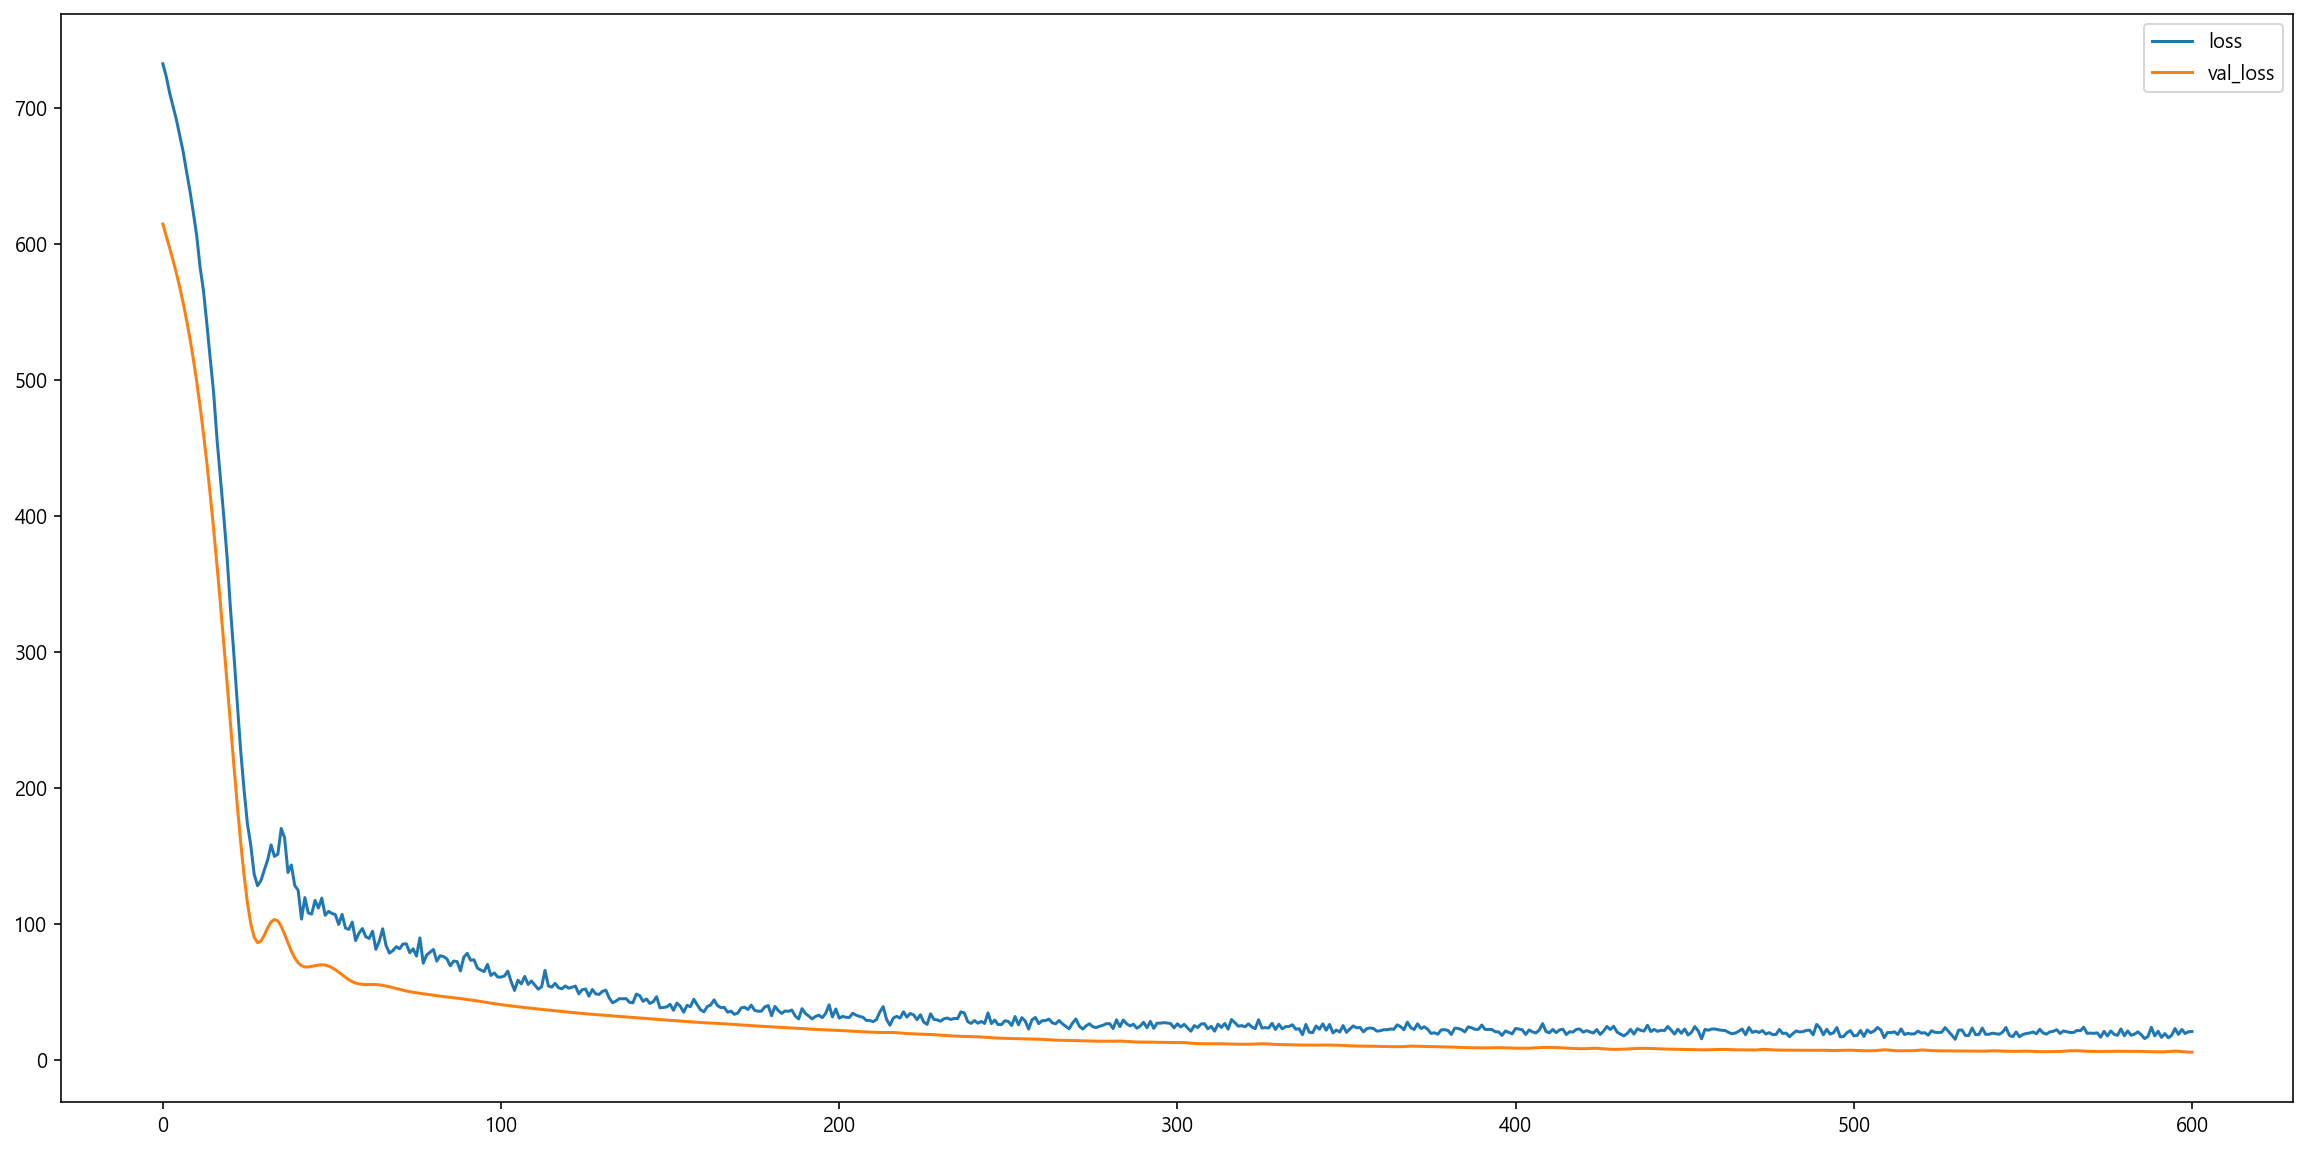

In [26]:
# 손실율 그래프
plt.figure(figsize=(20,10))
plt.plot(loss_list[:-50], label='loss')
plt.plot(val_loss_list[:-50], label = 'val_loss')
plt.legend()
plt.show()

In [34]:
# 모델을 가져온다.
best_model = load_model(path + '/best_model.h5')
best_model

In [35]:
# 검증데이터를 통해 예측 결과를 가져온다.
pred = best_model.predict(X_test2)
pred = pred.reshape(-1)
pred

3/3 [==============================] - 0s 57ms/step


array([27.327974, 19.86866 , 23.713615, 24.730904, 31.864883, 23.34116 ,
       18.537298, 26.168743, 19.632061, 25.174316, 16.697205, 19.970594,
       32.822964, 14.822575, 17.555573, 17.76474 , 23.408821, 19.684559,
       26.551266, 26.102394, 19.984175, 29.705387, 41.22846 , 18.000216,
       24.021723, 39.805775, 22.162737, 26.109013, 20.628366, 23.219894,
       16.668695, 18.622179, 19.524712, 21.336061, 19.396927, 28.982267,
       22.010683, 24.269136, 21.30511 , 20.919031, 25.69895 , 23.379047,
       21.40139 , 19.142876, 30.246979, 16.45058 , 24.784279, 21.444887,
       17.75394 , 18.889174, 13.673047, 20.961674, 15.353692, 22.153334,
       24.839457, 26.731543, 21.054533, 35.29255 , 18.820154, 24.792692,
       21.82255 , 25.368286, 24.789602, 18.922285, 18.110275, 45.004932,
       22.822126, 20.509783], dtype=float32)

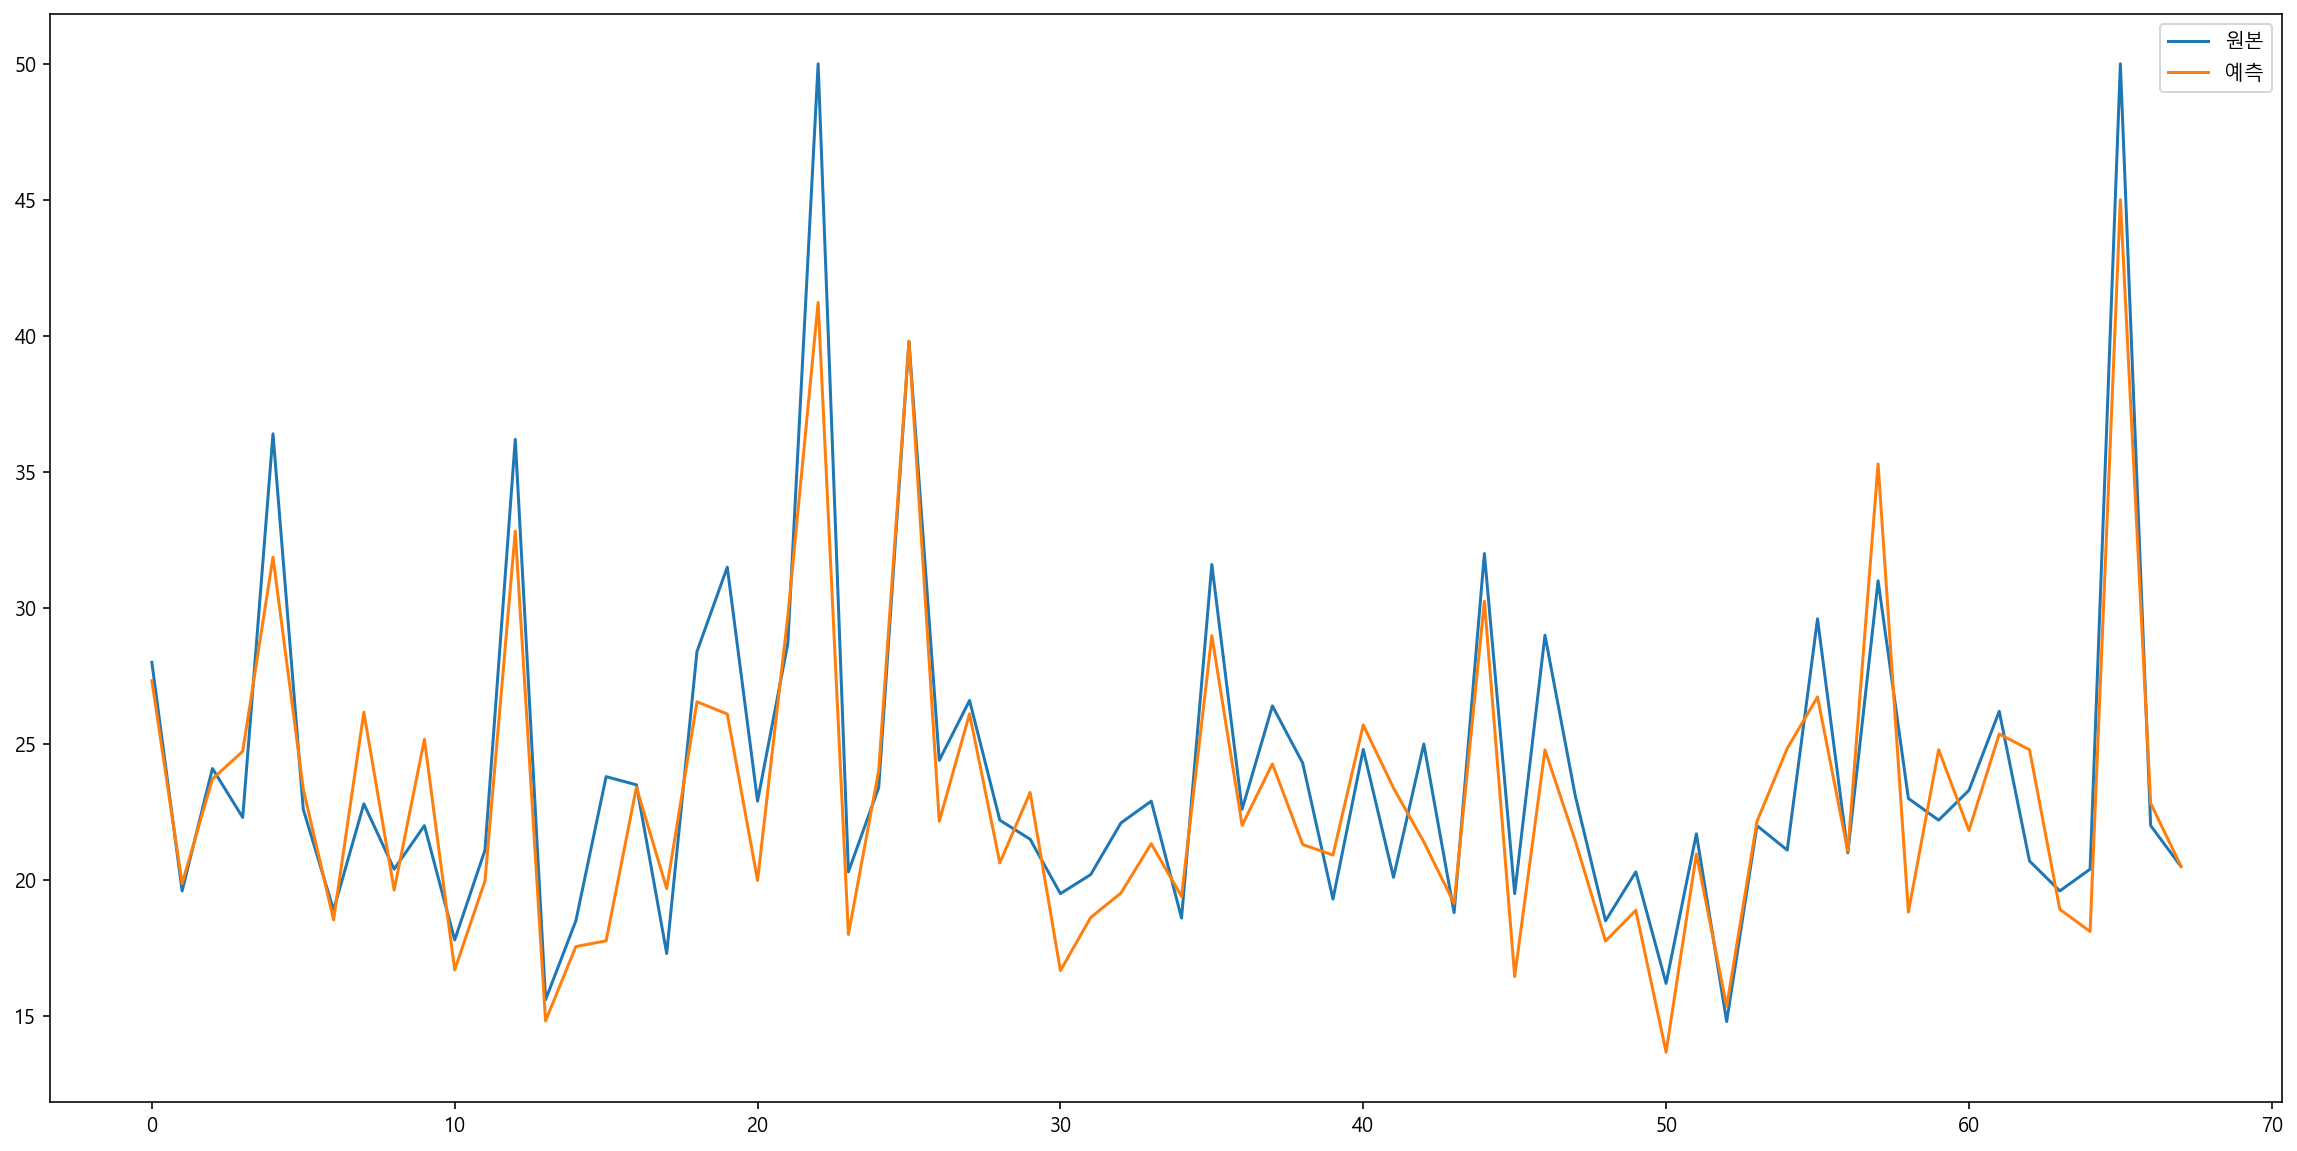

In [36]:
# 진짜 결과와 예측 결과를 시각화한다.
plt.figure(figsize=(20,10))
plt.plot(y_test.values, label='원본')
plt.plot(pred, label='예측')
plt.legend()
plt.show()